# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.091382e+01     6.932216e+00
 * time: 0.0018570423126220703
     1     2.787493e+01     4.963732e+00
 * time: 0.007184028625488281
     2     1.997858e+01     5.692848e+00
 * time: 0.012433052062988281
     3     1.352098e+01     3.927988e+00
 * time: 0.016184091567993164
     4     1.063473e+01     1.753183e+00
 * time: 0.019811153411865234
     5     9.749960e+00     2.060578e+00
 * time: 0.022809982299804688
     6     9.204499e+00     1.221038e+00
 * time: 0.025715112686157227
     7     8.898331e+00     8.712091e-01
 * time: 0.028753995895385742
     8     8.583867e+00     9.617071e-01
 * time: 0.03323197364807129
     9     8.355496e+00     7.620495e-01
 * time: 0.03749799728393555
    10     8.262659e+00     7.204918e-01
 * time: 0.04244399070739746
    11     8.190423e+00     6.270185e-01
 * time: 0.04596710205078125
    12     8.158730e+00     7.444265e-01
 * time: 0.0496821403503418
    13     8.104824e+00     5.652798e-01


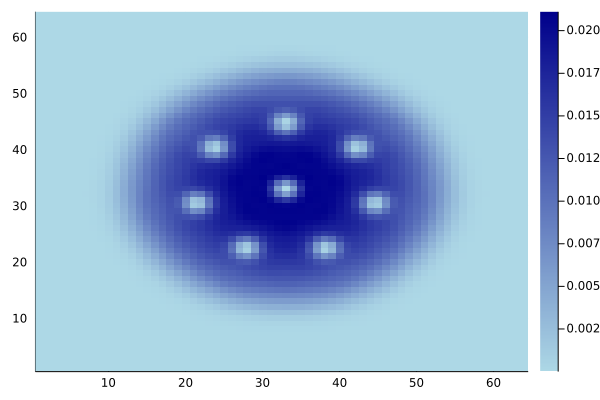

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)